<a href="https://colab.research.google.com/github/Rawiah0/EDA/blob/main/EDA_on_Airbnb_Listings%26Reviews_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The [dataset](https://www.kaggle.com/datasets/mysarahmadbhat/airbnb-listings-reviews/data) used is from Kaggle


# Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

# 1. Data Loading and Initial Exploration

## 1.1 Dataset Loading


In [ ]:
path_Listings = '/content/drive/MyDrive/project/Airbnb Data/Listings.csv'
path_Listings_data_dictionary = '/content/drive/MyDrive/project/Airbnb Data/Listings_data_dictionary.csv'
path_Reviews = '/content/drive/MyDrive/project/Airbnb Data/Reviews.csv'
path_Reviews_data_dictionary = '/content/drive/MyDrive/project/Airbnb Data/Reviews_data_dictionary.csv'

In [ ]:
df_Listings = pd.read_csv(path_Listings, encoding='unicode_escape')
df_Listings_data_dictionary = pd.read_csv(path_Listings_data_dictionary)
df_Reviews = pd.read_csv(path_Reviews)
df_Reviews_data_dictionary = pd.read_csv(path_Reviews_data_dictionary)

<ipython-input-4-f8f9070c3ce9>:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Listings = pd.read_csv(path_Listings, encoding='unicode_escape')


## 1.2 Dataset Structure

In [ ]:
df_Listings_data_dictionary

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


In [ ]:
df_Reviews_data_dictionary

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


* 33 columns on Listings dataset file
* 279712 rows

In [ ]:
df_Listings.shape

(279712, 33)

In [ ]:
df_Listings.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [ ]:
df_Listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

* 4 columns on Reviews dataset file
* 5,373,143 rows

In [ ]:
df_Reviews.shape

(5373143, 4)

In [ ]:
df_Reviews.dtypes

listing_id      int64
review_id       int64
date           object
reviewer_id     int64
dtype: object

In [ ]:
df_Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373143 entries, 0 to 5373142
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   listing_id   int64 
 1   review_id    int64 
 2   date         object
 3   reviewer_id  int64 
dtypes: int64(3), object(1)
memory usage: 164.0+ MB


## 1.3 First few rows of the dataset

In [ ]:
df_Listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
df_Reviews.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


# 2. Data Cleaning

## 2.1 Missing Values Handling

* Imputation
* Deletion
* Replacement



In [ ]:
# chek if there is any null row
df_Listings.isnull().all(axis=1).sum()

0

In [ ]:
# how many null values in each column of the datasert
df_Listings.isnull().sum()

listing_id                          0
name                              173
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

In [ ]:
# how many null values in total
df_Listings.isnull().sum().sum()

1286425

In [ ]:
# rows with no null values = 11849
df_Listings[~df_Listings.isnull().any(axis=1)]

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
26276,42449656,Romantic studio in New York best Bushwick,308165996,2019-11-08,"New York, New York, United States",within an hour,1.00,1.00,f,1.0,...,30,1125,90.0,10.0,10.0,10.0,8.0,10.0,9.0,f
26277,44358310,Stunning Corner luxurious 1 bed+office RH +30 day,301703046,2019-10-11,"Boca Raton, Florida, United States",within an hour,1.00,1.00,f,1.0,...,30,1125,65.0,8.0,8.0,8.0,7.0,9.0,7.0,f
26320,457829,Beautiful apartment in the heart of The Village,2275829,2012-05-02,"Manhattan, New York",within a day,1.00,1.00,f,1.0,...,30,1125,85.0,9.0,9.0,9.0,9.0,10.0,9.0,t
26321,4956469,Contemporary & Clean 1 bdrm Apartment(Lower Le...,25537637,2015-01-03,"Queens, New York, United States",within an hour,1.00,1.00,f,1.0,...,2,1125,93.0,9.0,9.0,10.0,9.0,9.0,9.0,t
26322,7962707,SPACIOUS APT CLOSE TO MANHATTAN!!,42008401,2015-08-20,"New York, New York, United States",within an hour,1.00,1.00,f,1.0,...,1,1125,93.0,10.0,9.0,10.0,9.0,9.0,10.0,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268683,46310277,Sunny West 4th Studio,69074662,2016-04-26,"New York, New York, United States",within an hour,0.88,0.75,f,1.0,...,30,45,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t
268684,46546450,Bright Williamsburg 1 Bedroom,17399047,2014-06-29,"Los Angeles, California, United States",within an hour,0.90,0.50,f,1.0,...,1,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
268685,47001322,Zen Cozy Clean Williamsburg Oasis - best location,16308791,2014-06-02,"New York, New York, United States",within a day,0.60,0.86,f,1.0,...,5,90,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
268686,47015466,West Village Studio w/Zen Garden 2-Min From Su...,52917571,2016-01-01,"New York, New York, United States",within a few hours,0.60,1.00,t,1.0,...,30,90,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
df_Reviews.isnull().sum()

listing_id     0
review_id      0
date           0
reviewer_id    0
dtype: int64

In [ ]:
# fill NaN rows in some columns with specific values
df_Listings_m = df_Listings.fillna({'host_response_time': 'within an hour', 'host_total_listings_count': 1,
                                    'host_is_superhost': 'f', 'host_identity_verified': 'f'})

In [ ]:
# fill NaN rows in some columns with its mean
df_Listings_m = df_Listings_m.fillna(value=df_Listings[['review_scores_accuracy', 'review_scores_cleanliness',
                                                      'review_scores_checkin','review_scores_communication',
                                                      'review_scores_location', 'review_scores_value']].mean().round(0))

In [ ]:
df_Listings_m = df_Listings_m.fillna(value=df_Listings_m[['host_response_rate', 'host_acceptance_rate',
                                                             'review_scores_rating']].mean().round(2))

In [ ]:
# fill the NaN values in 'bedrooms' column with half of the corresponding values from 'accommodates' column
# because there is may a relationship between bedrooms and accommodates
empty_indices = df_Listings_m[df_Listings_m['bedrooms'].isnull()].index
df_Listings_m.loc[empty_indices, 'bedrooms'] = df_Listings_m.loc[empty_indices, 'accommodates']//2

In [ ]:
# drop the NaN rows in 'host_since' column
df_Listings_m.dropna(subset=['host_since'], inplace=True)

In [ ]:
# to delete 'Ward i' rows
df_Listings_m = df_Listings_m[~df_Listings_m['neighbourhood'].str.match(r'^Ward \d+$')]

In [ ]:
df_Listings_m['neighbourhood'].value_counts() #567 -> 93 neighbourhoods = 'Ward i' that are dropped

neighbourhood
I Centro Storico     14869
Sydney                8051
Copacabana            7706
Cuauhtemoc            7625
Buttes-Montmartre     7232
                     ...  
Lighthouse Hill          1
Willowbrook              1
Magalhaes Bastos         1
Woodrow                  1
Agua Santa               1
Name: count, Length: 567, dtype: int64

In [ ]:
df_Listings_m.isnull().sum()

listing_id                          0
name                              173
host_id                             0
host_since                          0
host_location                     593
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   0
host_total_listings_count           0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood                       0
district                       223483
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                            0
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating                0
review_score

In [ ]:
# drop some columns
# df_Listings_m = df_Listings_m.drop(columns=['name', 'host_since', 'host_location', 'host_has_profile_pic'])
df_Listings_m.drop(['name', 'host_location', 'host_has_profile_pic',
                    'district', 'latitude', 'longitude', 'property_type'], axis=1, inplace=True)

In [ ]:
# normalize the 'review_scores_rating' column so its values between (0, 1)
df_Listings_m['review_scores_rating'] = df_Listings_m['review_scores_rating'] / df_Listings_m['review_scores_rating'].abs().max()

In [ ]:
df_Listings_m

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,1466919,2011-12-03,within an hour,0.87,0.83,f,1.0,f,Buttes-Montmartre,...,2,1125,1.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,10328771,2013-11-29,within an hour,0.87,0.83,f,1.0,t,Buttes-Montmartre,...,2,1125,1.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,19252768,2014-07-31,within an hour,0.87,0.83,f,1.0,f,Elysee,...,2,1125,1.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,10668311,2013-12-17,within an hour,0.87,0.83,f,1.0,t,Vaugirard,...,2,1125,1.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,24837558,2014-12-14,within an hour,0.87,0.83,f,1.0,f,Passy,...,2,1125,1.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,31161181,2015-04-13,within an hour,0.87,0.83,f,1.0,t,Observatoire,...,1,7,1.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,10294858,2013-11-27,within an hour,0.87,0.83,f,1.0,t,Buttes-Montmartre,...,7,15,1.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,2238502,2012-04-27,within an hour,0.87,0.83,f,1.0,t,Buttes-Montmartre,...,6,30,1.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,38633695,2015-07-16,within an hour,0.87,0.83,f,1.0,t,Popincourt,...,3,18,1.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
df_Listings_m.isnull().sum().sum()

0

## 2.2 Duplicate Entries Handling

In [ ]:
df_Listings_m[df_Listings_m.duplicated()]

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable


In [ ]:
df_Reviews[df_Reviews.duplicated()]

,listing_id,review_id,date,reviewer_id


### So there is no duplicate in the datset

## 2.3 Data Type Conversion

In [ ]:
df_Listings_m['host_since'] = pd.to_datetime(df_Listings_m['host_since'])

In [ ]:
df_Reviews_m = df_Reviews

In [ ]:
df_Reviews_m['date'] = pd.to_datetime(df_Reviews_m['date'])

In [ ]:
# convert column types from float to int
df_Listings_m[['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
               'review_scores_communication', 'review_scores_location',
               'review_scores_value', 'bedrooms',
               'host_total_listings_count']] = df_Listings_m[['review_scores_accuracy', 'review_scores_cleanliness',
                                                                    'review_scores_checkin', 'review_scores_communication',
                                                                    'review_scores_location', 'review_scores_value', 'bedrooms',
                                                                    'host_total_listings_count']].astype(int)

In [ ]:
df_Listings_m['price'] = df_Listings_m['price'].astype(float)

In [ ]:
# convert columns type from object to category that have small amount of unique values
df_Listings_m[['host_identity_verified', 'host_response_time', 'city',
               'host_is_superhost', 'review_scores_location', 'room_type',
               'instant_bookable']] = df_Listings_m[['host_identity_verified', 'host_response_time', 'city',
                                                     'host_is_superhost','review_scores_location','room_type',
                                                     'instant_bookable']].astype('category')

In [ ]:
df_Listings_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260477 entries, 0 to 279711
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   260477 non-null  int64         
 1   host_id                      260477 non-null  int64         
 2   host_since                   260477 non-null  datetime64[ns]
 3   host_response_time           260477 non-null  category      
 4   host_response_rate           260477 non-null  float64       
 5   host_acceptance_rate         260477 non-null  float64       
 6   host_is_superhost            260477 non-null  category      
 7   host_total_listings_count    260477 non-null  int64         
 8   host_identity_verified       260477 non-null  category      
 9   neighbourhood                260477 non-null  object        
 10  city                         260477 non-null  category      
 11  room_type                    26

In [ ]:
df_Reviews_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373143 entries, 0 to 5373142
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   listing_id   int64         
 1   review_id    int64         
 2   date         datetime64[ns]
 3   reviewer_id  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 164.0 MB


# 3. Exploratory Data Analysis

In [ ]:
# merge df_Listings_m dataset with df_Reviews_m dataframe (inner join)
df_Listings_Reviews = pd.merge(df_Listings_m, df_Reviews_m, on='listing_id')

In [ ]:
df_Listings_Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066992 entries, 0 to 5066991
Data columns (total 29 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   listing_id                   int64         
 1   host_id                      int64         
 2   host_since                   datetime64[ns]
 3   host_response_time           category      
 4   host_response_rate           float64       
 5   host_acceptance_rate         float64       
 6   host_is_superhost            category      
 7   host_total_listings_count    int64         
 8   host_identity_verified       category      
 9   neighbourhood                object        
 10  city                         category      
 11  room_type                    category      
 12  accommodates                 int64         
 13  bedrooms                     int64         
 14  amenities                    object        
 15  price                        float64       
 16  

In [ ]:
df_Listings_Reviews[df_Listings_Reviews.duplicated()]

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,review_id,date,reviewer_id


## 3.1 Univariate Analysis

### Categorical Visualization

#### Neighborhoods

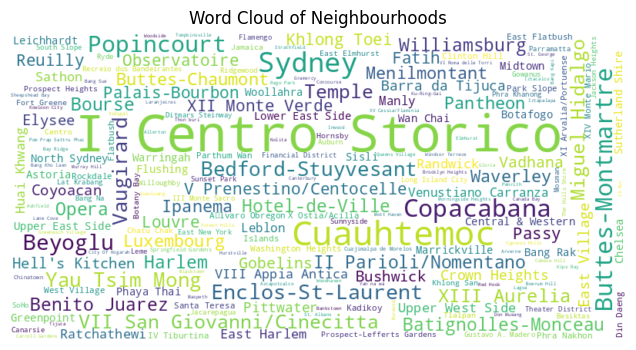

In [ ]:
neighbourhood_counts = df_Listings_Reviews['neighbourhood'].value_counts() # 547 neighbourhoods

# Word Cloud of the 'neighbourhood' column
plt.figure(figsize=(8, 4))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(neighbourhood_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Neighbourhoods')
plt.axis('off')
plt.show()

#### Host Response Time

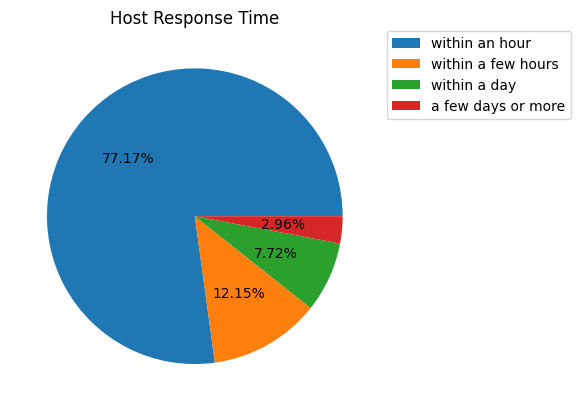

In [ ]:
ax1 = df_Listings_Reviews['host_response_time'].value_counts().plot(kind='pie', autopct='%1.2f%%', legend=True,
                                                                    title='Host Response Time', ylabel='',
                                                                    labeldistance=None)
ax1.legend(bbox_to_anchor=(1, 1.02))

#### Cities

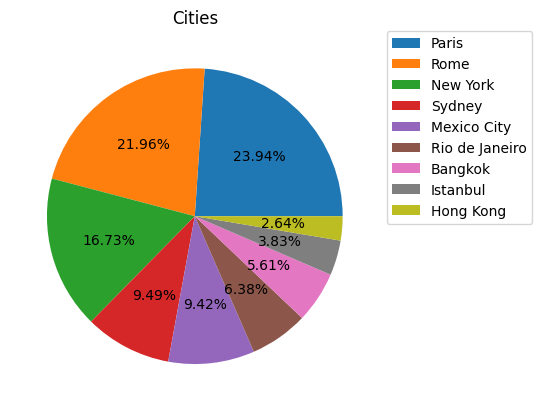

In [ ]:
ax2 = df_Listings_Reviews['city'].value_counts().plot(kind='pie', autopct='%1.2f%%', legend=True,
                                                      title='Cities', ylabel='',labeldistance=None)
ax2.legend(bbox_to_anchor=(1, 1.02))

#### Super Host

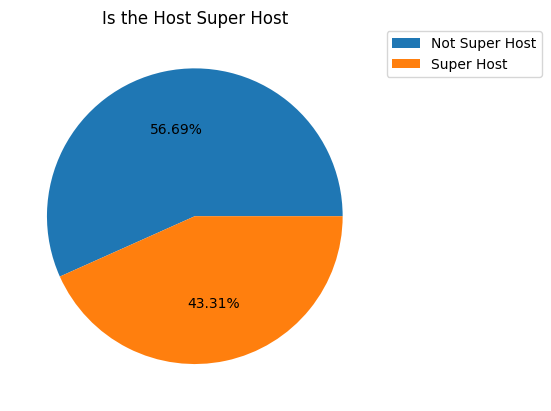

In [ ]:
ax = df_Listings_Reviews['host_is_superhost'].value_counts().plot(kind='pie', autopct='%1.2f%%', title='Is the Host Super Host',
                                                             ylabel='',labeldistance=None, legend=True)
ax.legend(['Not Super Host', 'Super Host'], bbox_to_anchor=(1, 1.02))

#### Instant Bookable

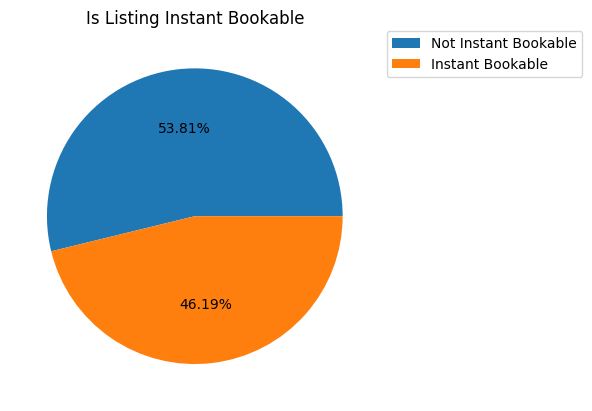

In [ ]:
ax3 = df_Listings_Reviews['instant_bookable'].value_counts().plot(kind='pie', autopct='%1.2f%%', legend=True, title='Is Listing Instant Bookable',
                                                            ylabel='',labeldistance=None)
ax3.legend(['Not Instant Bookable', 'Instant Bookable'], bbox_to_anchor=(1, 1.02))

#### Room Type

<Axes: title={'center': 'Room Types'}>

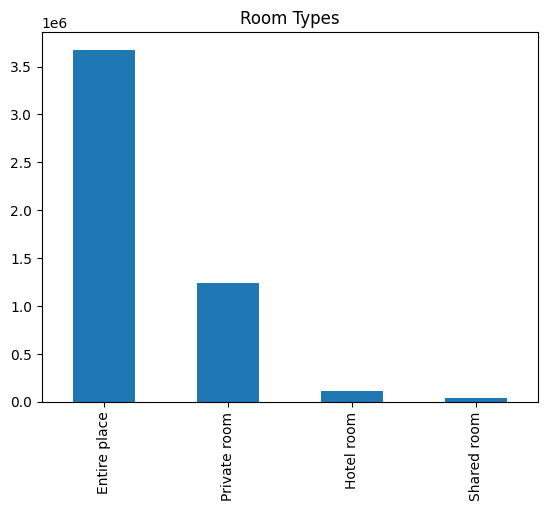

In [ ]:
df_Listings_Reviews['room_type'].value_counts().plot(kind='bar', title='Room Types')

#### Host Identity Verified

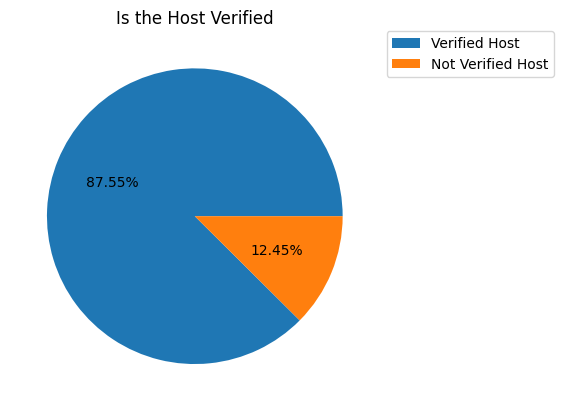

In [ ]:
ax4 = df_Listings_Reviews['host_identity_verified'].value_counts().plot(kind='pie', autopct='%1.2f%%', legend=True, title='Is the Host Verified',
                                                                  ylabel='',labeldistance=None)
ax4.legend(['Verified Host', 'Not Verified Host'], bbox_to_anchor=(1, 1.02))

### Numerical Visualization

#### Review Scores Rating

<ipython-input-73-234d79235826>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Listings_Reviews['review_scores_rating'])#, title="Listing's Overall Rating"


<Axes: xlabel='review_scores_rating', ylabel='Density'>

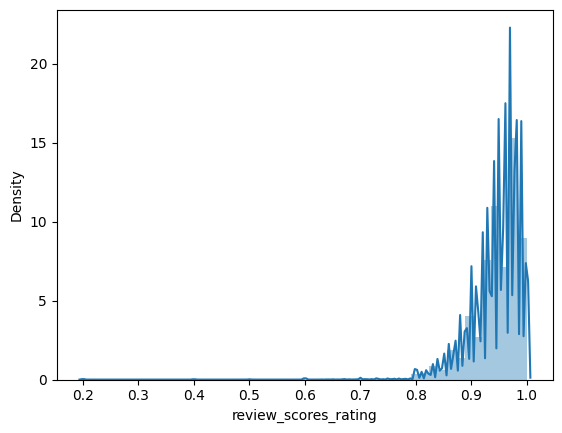

In [ ]:
sns.distplot(df_Listings_Reviews['review_scores_rating'])

#### Review Scores Cleanliness

<Axes: ylabel='review_scores_cleanliness'>

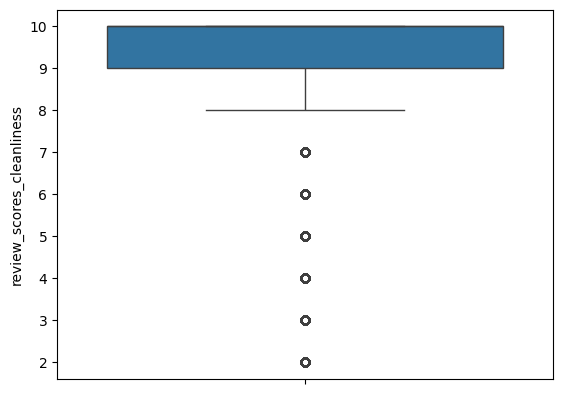

In [ ]:
sns.boxplot(df_Listings_Reviews['review_scores_cleanliness'])

#### Price

<ipython-input-76-4c680d22989a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Listings_Reviews['price'])#, title='Price'


<Axes: xlabel='price', ylabel='Density'>

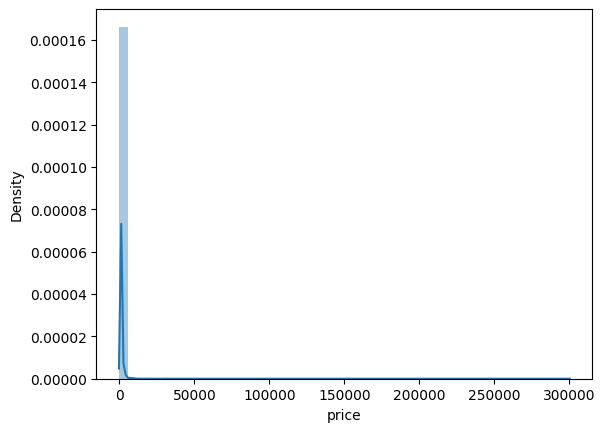

In [ ]:
sns.distplot(df_Listings_Reviews['price'])

#### Accommodates

<ipython-input-77-80c698eccddc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Listings_Reviews['accommodates'])#, title='Listing Accomodates'


<Axes: xlabel='accommodates', ylabel='Density'>

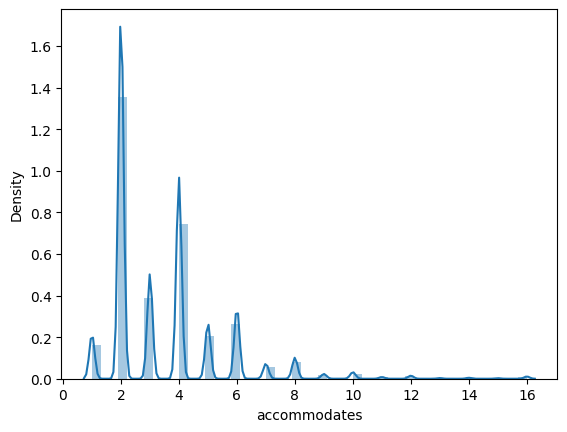

In [ ]:
sns.distplot(df_Listings_Reviews['accommodates'])

## 3.2 Bivariate Analysis

### Visualization

#### Compare Local Prices across Cities

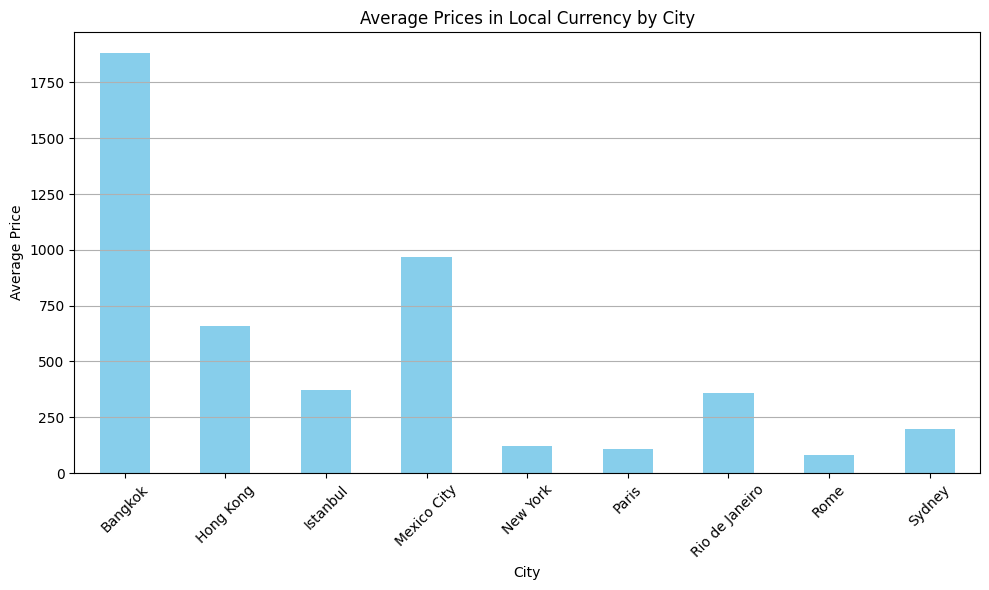

In [ ]:
average_prices = df_Listings_Reviews.groupby('city')['price'].mean()
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Prices in Local Currency by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Number of Neighborhoods in each City

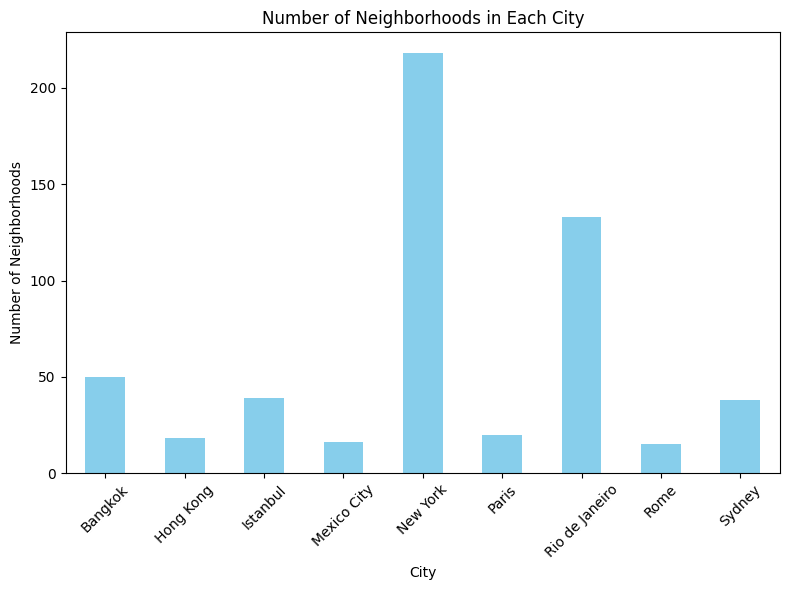

In [ ]:
neighborhoods_per_city = df_Listings_Reviews.groupby('city')['neighbourhood'].nunique()

plt.figure(figsize=(8, 6))
neighborhoods_per_city.plot(kind='bar', color='skyblue')
plt.title('Number of Neighborhoods in Each City')
plt.xlabel('City')
plt.ylabel('Number of Neighborhoods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Top 10 Listings Reviewed

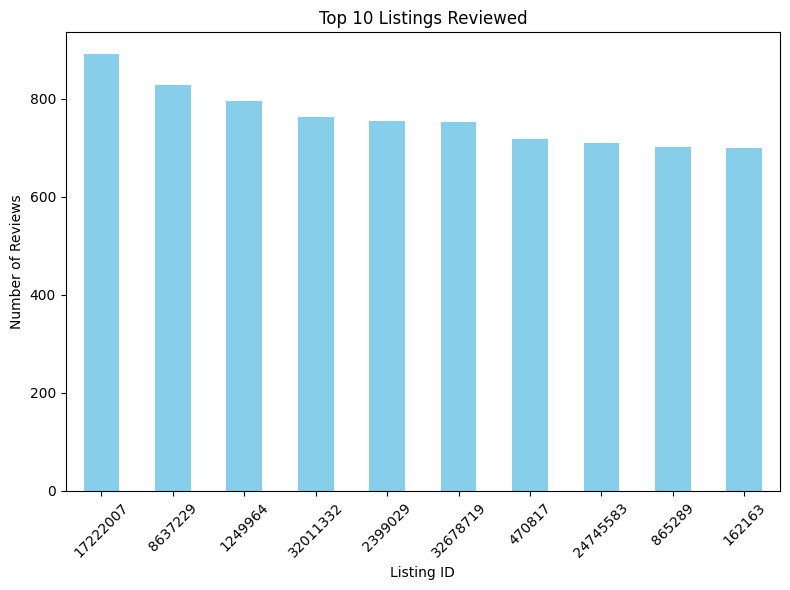

In [ ]:
review_counts = df_Listings_Reviews.groupby('listing_id')['review_id'].count()

top_10_review_counts = review_counts.nlargest(10)

plt.figure(figsize=(8, 6))
top_10_review_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Listings Reviewed')
plt.xlabel('Listing ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Statistics

#### Summary Statistics of Prices by City

In [ ]:
df_Listings_Reviews.groupby('city')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Bangkok,284342.0,1880.728594,9262.193594,274.0,700.0,1000.0,1624.0,300177.0
Hong Kong,134021.0,660.484223,968.260459,78.0,290.0,460.0,729.0,66666.0
Istanbul,194000.0,373.136196,1384.510994,38.0,171.0,260.0,404.0,179532.0
Mexico City,477429.0,968.818964,1543.529164,100.0,475.0,750.0,1136.0,206499.0
New York,847580.0,122.156614,195.711194,10.0,62.0,95.0,142.0,10000.0
Paris,1212931.0,108.491911,155.249744,8.0,60.0,80.0,120.0,12000.0
Rio de Janeiro,323092.0,356.717118,2849.581420,33.0,131.0,197.0,302.0,129080.0
Rome,1112837.0,81.301950,166.767460,9.0,44.0,60.0,89.0,10000.0
Sydney,480760.0,198.326084,677.613747,11.0,85.0,124.0,184.0,28613.0


#### Summary Statistics of Number of Neighborhoods in Each City

In [ ]:
neighborhoods_per_city.describe()

count      9.000000
mean      60.777778
std       69.496003
min       15.000000
25%       18.000000
50%       38.000000
75%       50.000000
max      218.000000
Name: neighbourhood, dtype: float64

# 4. Feature Engineering

## 4.1 New Features

In [ ]:
unique_amenities = set()

for row in df_Listings_Reviews['amenities']:
    # each row in amenities column looks like "["str",...]"
    amenities = [amenity.strip().strip('"').lower() for amenity in row.strip('[]').split(',')]
    for amenity in amenities:
        if amenity == '':
            unique_amenities.add(amenity)
        elif not amenity.isalpha():
            cleaned_amenity = ''.join(char if char.isalpha() else ' ' for char in amenity)
            unique_amenities.add(cleaned_amenity)
        else:
            unique_amenities.add(amenity)

In [ ]:
print(len(unique_amenities))

1752


In [ ]:
# unify the amenities
unified_amenities = []

for row in df_Listings_Reviews['amenities']:
    # each row in amenities column looks like "["str",...]"
    amenities = [amenity.strip().strip('"').lower() for amenity in row.strip('[]').split(',')]
    new_row = set()
    for amenity in amenities:
        if amenity in unique_amenities:
            new_row.add(amenity)
        else:
            new_row.add('other')
    unified_amenities.append(', '.join(new_row))

In [ ]:
df_Listings_Reviews['unified_amenities'] = unified_amenities

In [ ]:
# count the amenities in each row
amenities_counts = []

for row in df_Listings_Reviews['unified_amenities']:
  amenity = len(row.split(', ')) if row != '' else 0
  amenities_counts.append(amenity)

In [ ]:
# add new feature that count the amenities
df_Listings_Reviews['amenities_counter'] = amenities_counts

In [ ]:
df_Listings_Reviews['host_since_year'] = df_Listings_Reviews['host_since'].dt.year
df_Listings_Reviews['host_since_month'] = df_Listings_Reviews['host_since'].dt.month

#### Hosts Registration by Year Visualization

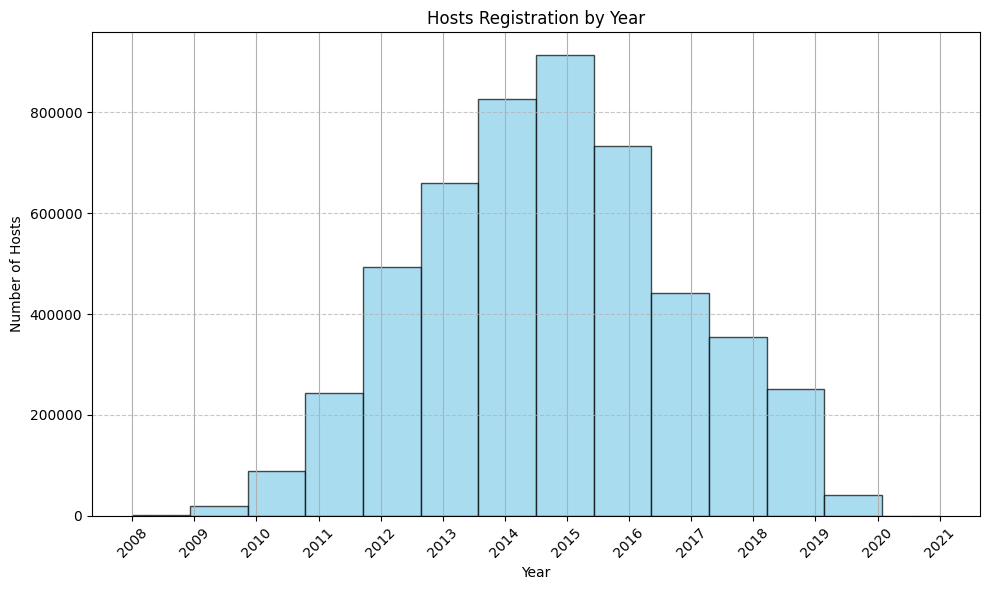

In [ ]:
plt.figure(figsize=(10, 6))
df_Listings_Reviews['host_since_year'].hist(bins=df_Listings_Reviews['host_since_year'].nunique(),
                                            color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Hosts Registration by Year')
plt.xlabel('Year')
plt.ylabel('Number of Hosts')
plt.xticks(df_Listings_Reviews['host_since_year'].unique(), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_Listings_Reviews['review_year'] = df_Listings_Reviews['date'].dt.year
df_Listings_Reviews['review_month'] = df_Listings_Reviews['date'].dt.month

In [ ]:
df_Listings_Reviews.head(1)

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,...,instant_bookable,review_id,date,reviewer_id,unified_amenities,amenities_counter,host_since_year,host_since_month,review_year,review_month
0,281420,1466919,2011-12-03,within an hour,0.87,0.83,f,1,f,Buttes-Montmartre,...,f,173279221,2017-07-23,3501898,"kitchen, long term stays allowed, wifi, heatin...",5,2011,12,2017,7


In [ ]:
df_Listings_Reviews.columns

Index(['listing_id', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_identity_verified', 'neighbourhood',
       'city', 'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'review_id', 'date', 'reviewer_id', 'unified_amenities',
       'amenities_counter', 'host_since_year', 'host_since_month',
       'review_year', 'review_month'],
      dtype='object')

#### Reviews by Year Visualization

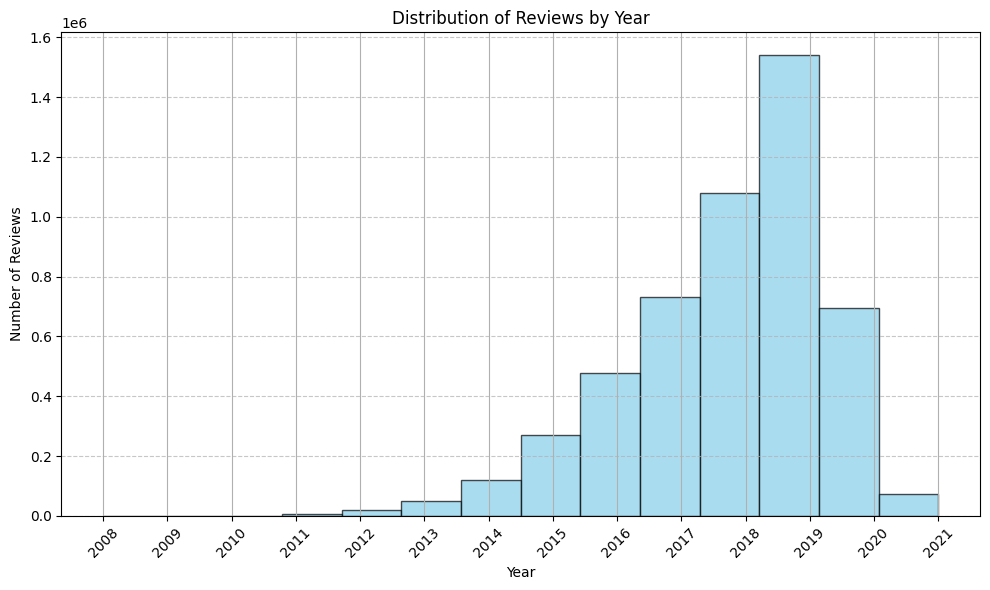

In [ ]:
plt.figure(figsize=(10, 6))
df_Listings_Reviews['review_year'].hist(bins=df_Listings_Reviews['review_year'].nunique(),
                                        color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(df_Listings_Reviews['review_year'].unique(), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Reviews by Month Visualization

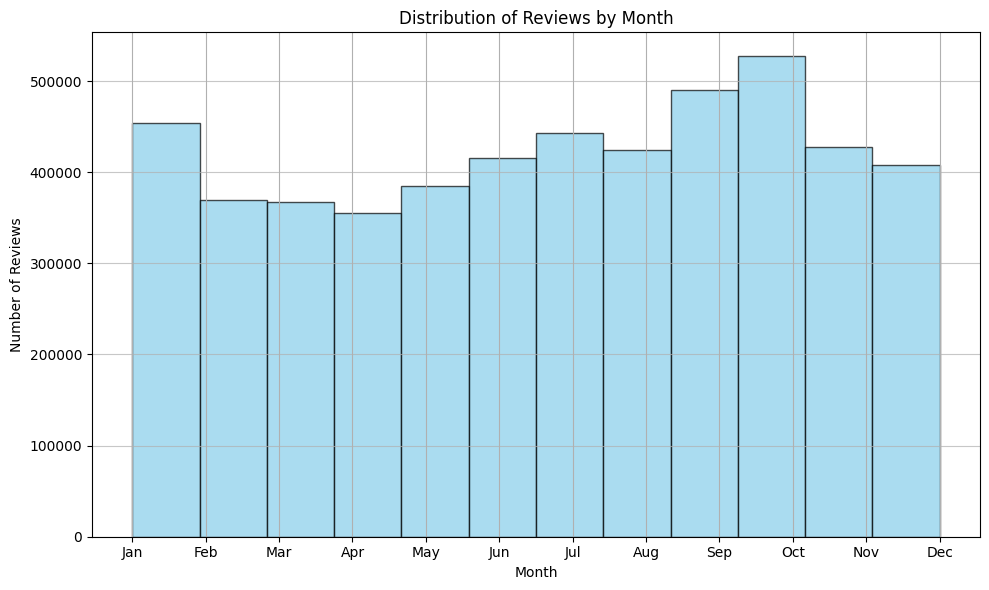

In [ ]:
plt.figure(figsize=(10, 6))
df_Listings_Reviews['review_month'].hist(bins=12, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Reviews by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_Listings_Reviews.drop(columns=['date', 'host_since'], inplace=True)

In [ ]:
df_Listings_Reviews['city'].value_counts()

city
Paris             1212931
Rome              1112837
New York           847580
Sydney             480760
Mexico City        477429
Rio de Janeiro     323092
Bangkok            284342
Istanbul           194000
Hong Kong          134021
Name: count, dtype: int64

In [ ]:
# new column after unify the currencies to USD currency
city_currencies = {'Paris': 'EUR', 'New York': 'USD', 'Bangkok': 'THB', 'Rio de Janeiro': 'BRL', 'Sydney': 'AUD',
                   'Istanbul': 'TRY', 'Rome': 'EUR', 'Hong Kong': 'HKD', 'Mexico City': 'MXN'}

exchange_rates = {'EUR': 1.1, 'USD': 1.0, 'THB': 0.03, 'BRL': 0.2, 'AUD': 0.7, 'TRY': 0.03, 'HKD': 0.13, 'MXN': 0.06}

df_Listings_Reviews['USD_price'] = df_Listings_Reviews.apply(lambda row: row['price'] * exchange_rates[city_currencies[row['city']]], axis=1)


#### Compare Prices across Cities after Currency Unification Visualization

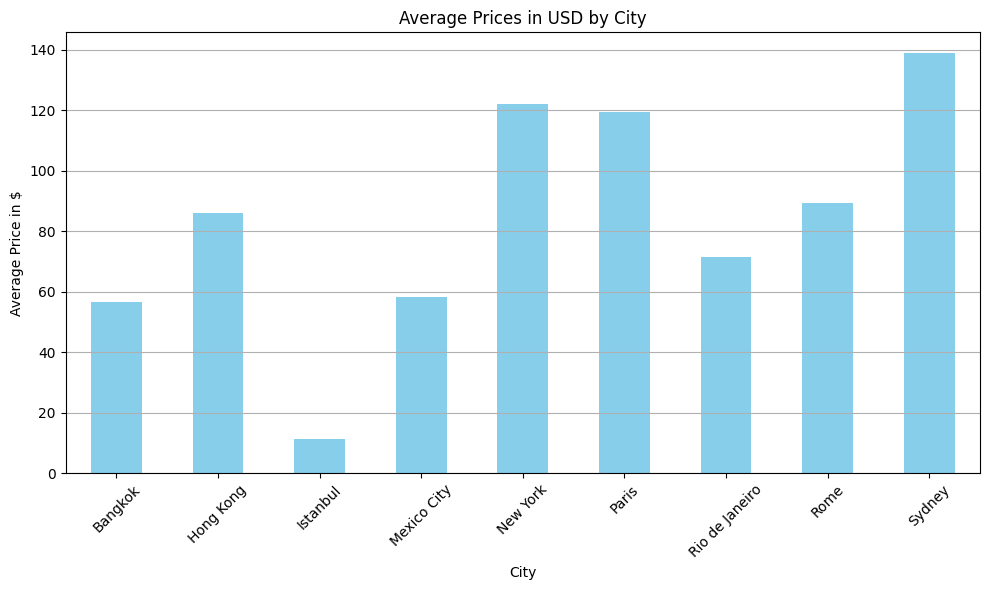

In [ ]:
average_prices_USD = df_Listings_Reviews.groupby('city')['USD_price'].mean()
plt.figure(figsize=(10, 6))
average_prices_USD.plot(kind='bar', color='skyblue')
plt.title('Average Prices in USD by City')
plt.xlabel('City')
plt.ylabel('Average Price in $')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Local and Unified Currencies Comparison Visualization

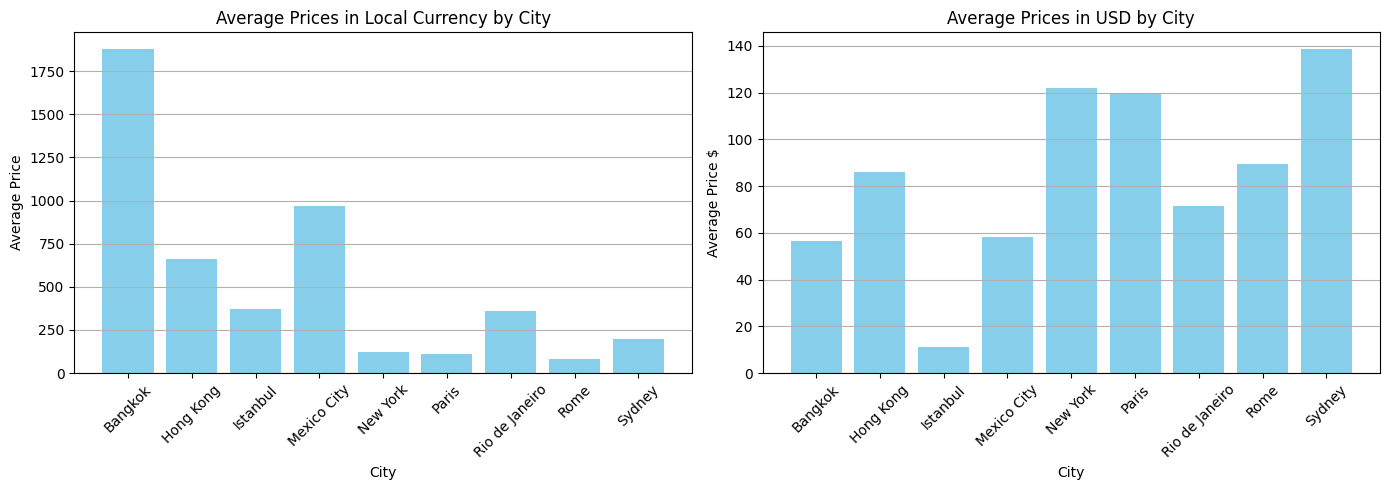

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

axes[0].bar(average_prices.index, average_prices, color='skyblue')
axes[0].set_title('Average Prices in Local Currency by City')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Average Price')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

axes[1].bar(average_prices_USD.index, average_prices_USD, color='skyblue')
axes[1].set_title('Average Prices in USD by City')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Average Price $')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

plt.tight_layout()

plt.show()

## 4.2 Categorical Encoding

In [ ]:
# change values of t, f into 1, 0
df_Listings_Reviews['host_identity_verified'] = df_Listings_Reviews['host_identity_verified'].replace({'t': 1, 'f': 0})
df_Listings_Reviews['host_is_superhost'] = df_Listings_Reviews['host_is_superhost'].replace({'t': 1, 'f': 0})
df_Listings_Reviews['instant_bookable'] = df_Listings_Reviews['instant_bookable'].replace({'t': 1, 'f': 0})

In [ ]:
# encode host_response_time
df_Listings_Reviews['host_response_time_encoded'] = LabelEncoder().fit_transform(df_Listings_Reviews['host_response_time'])

In [ ]:
df_Listings_Reviews['city_encoded'] = LabelEncoder().fit_transform(df_Listings_Reviews['city'])

In [ ]:
df_Listings_Reviews['room_type_encoded'] = LabelEncoder().fit_transform(df_Listings_Reviews['room_type'])

# 5. Conclusion

---


**Based of the visualizations we conclude that:**
* The most expensive average price among the nine cities in the dataset is in Sydney, and the cheapest is in Istanbul.
* The most popular month for visits, based on the number of reviews, is October.
* Airbnb usage began to spread among users and hosts starting in 2012.
* The number of users grew steadily until 2019, after which it declined.
* Comparing prices in local currencies with prices in a unified currency provides insights into the value of local currencies.





# References
* [To fix UnicodeDecodeError](https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s)
* [To show data type of dataset columns](https://www.tutorialspoint.com/how-to-check-the-data-type-in-pandas-dataframe)
* [To fill different columns with specific values](https://www.youtube.com/watch?v=uDr67HBIPz8)
* [To replace column values with a value](https://www.youtube.com/watch?v=6Ev7xmgVfKU)
* [To drop columns](https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe)
* [To convert column type](https://sentry.io/answers/change-a-column-type-in-a-dataframe-in-python-pandas/)
* [To normalize a column](https://www.geeksforgeeks.org/normalize-a-column-in-pandas/)
* [To concatenate columns](https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/)
* [To rename a column](https://stackoverflow.com/questions/61450791/pandas-dataframe-how-to-drop-and-rename-column)
* [To merge 2 DataFrames](https://www.youtube.com/watch?v=h4hOPGo4UVU)
* [Visualizations](https://www.youtube.com/watch?v=rOHXb0WNA3c)
* [Plots Titles](https://stackoverflow.com/questions/68909283/how-to-customize-pandas-pie-plot-with-labels-and-legend)
* [To drop some NaN rows in a column](https://www.aporia.com/resources/how-to/drop-rows-pandas-dataframe-column-vamue-nan/)